In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.outliers_influence as sms
from statsmodels.tools.tools import add_constant

from patsy.contrasts import ContrastMatrix
from patsy.contrasts import Poly
%matplotlib inline

In [2]:
data = pd.read_csv('Tumour.csv')

In [3]:
data

,usage,tumor
0,0,0.018204
1,0,0.000744
2,0,0.005511
3,0,0.007209
4,0,0.037119
...,...,...
115,5,3.671347
116,5,4.425939
117,5,4.618617
118,5,5.108129


In [8]:
data.groupby('usage')['tumor'].describe()

,count,mean,std,min,25%,50%,75%,max
usage,,,,,,,,
0,20.0,0.017550,0.012127,0.000744,0.006692,0.016071,0.029029,0.037119
1,20.0,0.514886,0.284192,0.002875,0.318947,0.547676,0.746559,0.940278
2,20.0,1.261363,0.492176,0.477527,0.953307,1.240071,1.644405,2.342072
3,20.0,3.021594,0.765556,1.774236,2.541288,2.940136,3.602811,4.306406
4,20.0,4.887795,0.696255,3.038391,4.638579,5.127214,5.308325,6.048880
5,20.0,4.730594,0.781626,2.702742,4.350807,4.865420,5.264826,6.139896


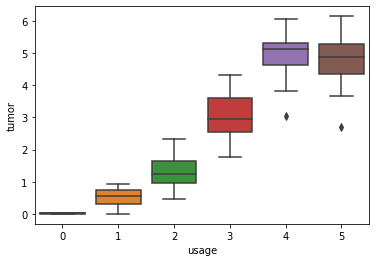

In [9]:
_ = sns.boxplot(x='usage', y='tumor', data=data)

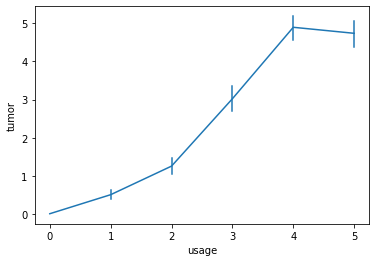

In [10]:
_ = sns.lineplot(x='usage', y='tumor',data=data, err_style='bars')

In [12]:
m01 = ols('tumor~C(usage)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tumor   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     269.7
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           2.01e-61
Time:                        22:52:57   Log-Likelihood:                -101.43
No. Observations:                 120   AIC:                             214.9
Df Residuals:                     114   BIC:                             231.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0175      0.129      0.136      0.892      -0.239       0.274
C(usage)[T.1]     0.4973      0.183      2.721      0.008       0.135       0.859
C(usage)[T.2]     1.2438      0.183      6.804      0.000       0.882       1.606
C(usage)[T.3]     3.0040      0.183     16.434      0.000       2.642       3.366
C(usage)[T.4]     4.8702      0.183     26.643      0.000       4.508       5.232
C(usage)[T.5]     4.7130      0.183     25.783      0.000       4.351       5.075
==============================================================================
Omnibus:                       12.599   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.025
Skew:                          -0.534   Prob(JB):                     0.000122
Kurtosis:                       4.569   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
data_0 = data[data['usage']==0]
data_1 = data[data['usage']==1]
data_2 = data[data['usage']==2]
data_3 = data[data['usage']==3]
data_4 = data[data['usage']==4]
data_5 = data[data['usage']==5]

In [14]:
anova_table = sm.stats.anova_lm(m01)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(usage),5.0,450.664018,90.132804,269.732848,2.007786e-61
Residual,114.0,38.093765,0.334156,NaN,NaN


In [15]:
prediction = pd.DataFrame(m01.fittedvalues)
prediction.columns = ['predicted'] 
prediction.head()

,predicted
0,0.01755
1,0.01755
2,0.01755
3,0.01755
4,0.01755


In [16]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [17]:
summary_frame = sms.OLSInfluence(m01).summary_frame()

In [18]:
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

In [19]:
summary_frame .head()

,dfb_Intercept,dfb_C(usage)[T.1],dfb_C(usage)[T.2],dfb_C(usage)[T.3],dfb_C(usage)[T.4],dfb_C(usage)[T.5],cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits,predicted,standarized_prediction
0,0.000265,-0.000188,-0.000188,-0.000188,-0.000188,-0.000188,1.183400e-08,0.001161,0.05,0.000266,0.001156,0.000265,0.01755,-1.227145
1,-0.006813,0.004817,0.004817,0.004817,0.004817,0.004817,7.804341e-06,-0.029828,0.05,-0.006843,-0.029697,-0.006813,0.01755,-1.227145
2,-0.004881,0.003451,0.003451,0.003451,0.003451,0.003451,4.005003e-06,-0.021368,0.05,-0.004902,-0.021274,-0.004881,0.01755,-1.227145
3,-0.004192,0.002964,0.002964,0.002964,0.002964,0.002964,2.955004e-06,-0.018354,0.05,-0.004211,-0.018273,-0.004192,0.01755,-1.227145
4,0.007933,-0.005610,-0.005610,-0.005610,-0.005610,-0.005610,1.058185e-05,0.034732,0.05,0.007968,0.034580,0.007933,0.01755,-1.227145


In [23]:
stat, p = st.levene(data_0['tumor'],data_1['tumor'], data_2['tumor'], data_3['tumor'],data_4['tumor'],data_5['tumor'])
print(stat, p)

8.395289505831853 8.680626542678236e-07


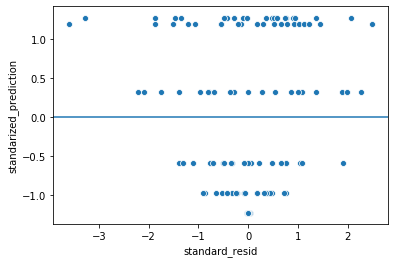

In [20]:
_ = sns.scatterplot(x = 'standard_resid', y='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

In [21]:
st.shapiro(data['tumor'])

(0.8832380175590515, 2.9838474802090786e-08)

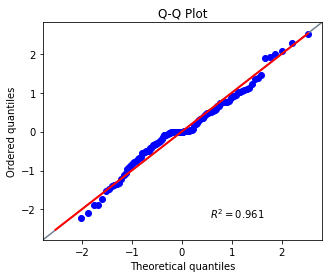

In [22]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

In [24]:
aov = pg.welch_anova(dv='tumor', between='usage', data=data)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,usage,5,44.390252,414.925978,4.528544e-36,0.92206


In [25]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [26]:
multicomp = MultiComparison(data['tumor'], data['usage'])   # testfunc

In [27]:
# Benjamini-Hochberg
com_bh = multicomp.allpairtest(st.ttest_ind, method='fdr_bh')
print(com_bh[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=fdr_bh
alphacSidak=0.00, alphacBonf=0.003
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
     0      1  -7.8191    0.0       0.0   True
     0      2 -11.2984    0.0       0.0   True
     0      3 -17.5465    0.0       0.0   True
     0      4 -31.2775    0.0       0.0   True
     0      5 -26.9628    0.0       0.0   True
     1      2  -5.8739    0.0       0.0   True
     1      3  -13.728    0.0       0.0   True
     1      4 -26.0049    0.0       0.0   True
     1      5 -22.6686    0.0       0.0   True
     2      3  -8.6494    0.0       0.0   True
     2      4 -19.0206    0.0       0.0   True
     2      5 -16.7969    0.0       0.0   True
     3      4  -8.0651    0.0       0.0   True
     3      5  -6.9857    0.0       0.0   True
     4      5   0.6716 0.5059    0.5059  False
----------------------------------------------


#### ***It  is  clear  from  the  table  that  each  group  of  participants  is  compared  to  all  of  the  remaining groups.  At  the  bottom  of  the  table, we  can  see  that  group  5  is  compared  to the groups  that used their phones 0, 1, 2, 3 and 4 hours a day and reveals a significant difference in all cases (all  the  values  in  the  columns are less than .05) except for the comparison between the 4-and 5-hour  groups.  In  the  next  part  of  the  table,  the 4-hour  group  is  compared  to  all  other groups. Again all comparisons are significant (all the values in the columns are less than .05). In fact, all of the comparisons appear to be highly significant except the comparison between the 4- and 5-hour groups, which is non-significant because the value is bigger than .05***

### calculating effect size

In [28]:
SSm = 450.664018
SSr = 38.09
SSt = SSm+SSr

In [29]:
MSm = 90.132804
MSr = .3341

In [32]:
ω_squared = (SSm-5*MSr)/(SSt+MSr)   # here ω_squared is like adjusted R_squared
ω_squared

0.918021725483832

In [33]:
ω = np.sqrt(ω_squared)       # ω, more accurate measure of R
ω

0.9581345028146268

### Interpreting and writing the result
#### We could report the main finding as:•Levene’s  test  indicated  that  the  assumption  of  homogeneity  of  variance  had  been violated, F(5, 114) = 8.40, p < .001. Transforming the data did not rectify this problem and so F-tests are reported nevertheless. The results show that using a mobile phone significantly  affected  the  size  of  brain  tumour  found  in  participants, F(5,  114)  = 269.73, p < .001, ω2 = .92. The effect size indicated that the effect of phone use on tumour size was substantial.The next thing that needs to be reported are the post hoc comparisons. It is customary just to summarize these tests in very general terms like this:•Benjamini–Hochbergpost  hoc tests revealed significant differences between all groups (p < .001 for all tests) except between 4 and 5 hours (ns)